In [35]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 608.9 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


import warnings
warnings.fillterwarning('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv("/Users/krutikakatke/Documents/fashion-business-analyst-AI/Data/business_sales_data.csv")
train_data.shape, train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        500 non-null    int64  
 1   ProductCategory  500 non-null    object 
 2   Material         500 non-null    object 
 3   Brand            500 non-null    object 
 4   UnitCost         500 non-null    int64  
 5   UnitPrice        500 non-null    int64  
 6   Discount         500 non-null    float64
 7   UnitsSold        500 non-null    int64  
 8   Region           500 non-null    object 
 9   StoreType        500 non-null    object 
 10  Season           500 non-null    object 
 11  CustomerRating   500 non-null    float64
 12  ProfitMargin     500 non-null    float64
 13  Revenue          500 non-null    float64
 14  IsTopSeller      500 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 58.7+ KB


((500, 15), None)

In [9]:
numeric_cols = train_data.select_dtypes(include=[np.number])
numeric_cols.head()

,ProductID,UnitCost,UnitPrice,Discount,UnitsSold,CustomerRating,ProfitMargin,Revenue
0,1000,2387,16263,0.17,290,3.0,5.81,3914504.10
1,1001,1765,9355,0.17,223,4.9,4.30,1731516.95
2,1002,7991,19552,0.03,40,2.9,1.45,758617.60
3,1003,1540,17469,0.10,346,3.9,10.34,5439846.60
4,1004,9609,948,0.08,192,3.9,-0.90,167454.72


In [10]:
def detect_outliers_iqr(df):
    outlier_summary = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        outlier_summary[col] = round(outlier_percentage, 2)
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['% Outliers']).sort_values(by='% Outliers', ascending=False)

iqr_outliers = detect_outliers_iqr(numeric_cols)
iqr_outliers.head(15)

,% Outliers
ProfitMargin,9.4
Revenue,3.6
UnitsSold,1.4
CustomerRating,0.4
ProductID,0.0
UnitCost,0.0
UnitPrice,0.0
Discount,0.0


In [11]:
from scipy import stats

z_scores = np.abs(stats.zscore(numeric_cols.select_dtypes(include=[np.number]), nan_policy='omit'))
outliers_z = (z_scores > 3).sum(axis=0)
outlier_percent_z = (outliers_z / len(numeric_cols)) * 100
pd.DataFrame(outlier_percent_z, columns=['% Outliers (Z-score)']).sort_values(by='% Outliers (Z-score)', ascending=False).head(15)

,% Outliers (Z-score)
6,3.4
4,1.2
7,0.8
5,0.4
0,0.0
1,0.0
2,0.0
3,0.0


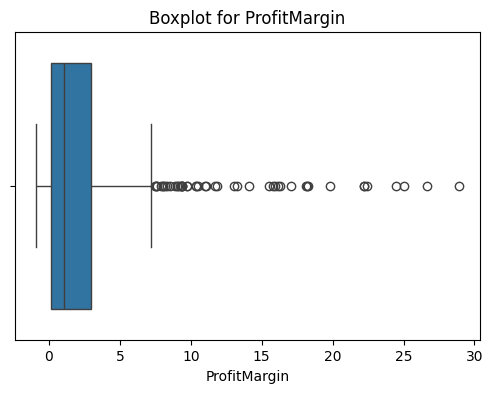

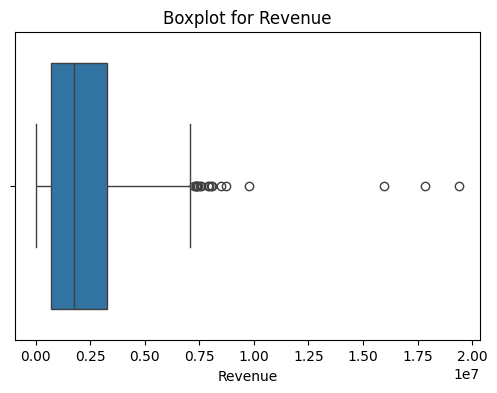

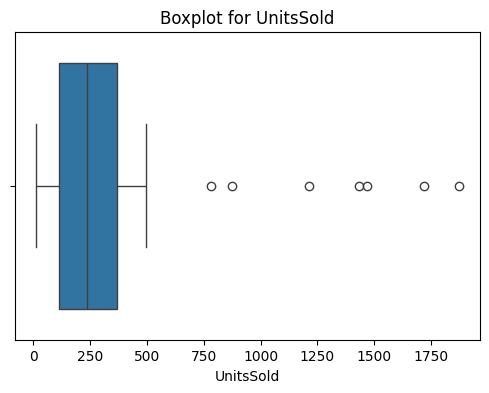

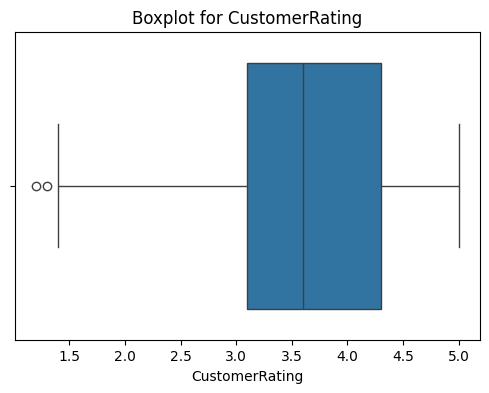

In [19]:
cols_to_plot = ['ProfitMargin', 'Revenue', 'UnitsSold', 'CustomerRating']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(train_data[col],orient='h')
    plt.title(f"Boxplot for {col}")
    plt.show()

In [20]:
import pandas as pd
cols_to_plot = ['ProfitMargin', 'Revenue', 'UnitsSold', 'CustomerRating']
for col in cols_to_plot:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train_data[col] = np.where(train_data[col] < lower, lower,
                       np.where(train_data[col] > upper, upper, train_data[col]))

print("✅ Outliers capped successfully!")


✅ Outliers capped successfully!


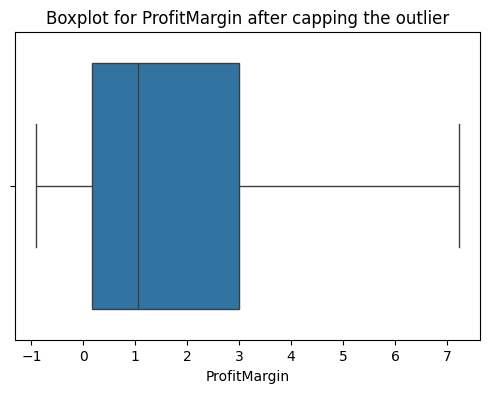

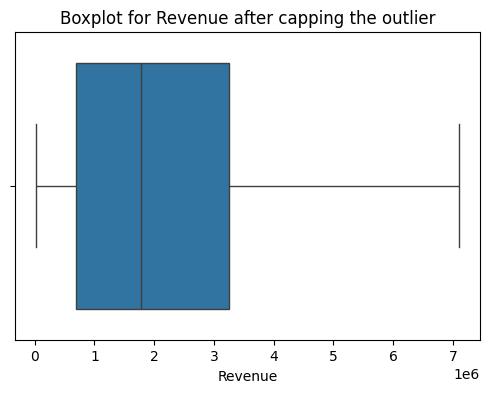

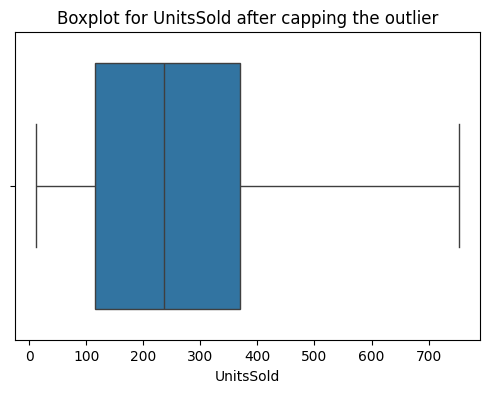

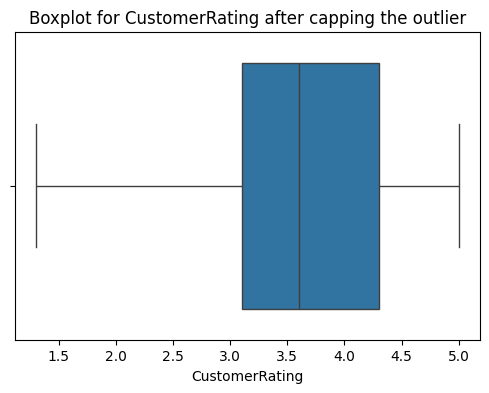

In [21]:
cols_to_plot = ['ProfitMargin', 'Revenue', 'UnitsSold', 'CustomerRating']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(train_data[col],orient='h')
    plt.title(f"Boxplot for {col} after capping the outlier")
    plt.show()

check for missing value

In [23]:
print(train_data.isnull().sum())

ProductID          0
ProductCategory    0
Material           0
Brand              0
UnitCost           0
UnitPrice          0
Discount           0
UnitsSold          0
Region             0
StoreType          0
Season             0
CustomerRating     0
ProfitMargin       0
Revenue            0
IsTopSeller        0
dtype: int64


now after knowing that there is no null value so i will on encoding the categorical data

In [30]:
categorial_cols = train_data.select_dtypes(include=['object', 'category'])
categorial_cols.head()


,ProductCategory,Material,Brand,Region,StoreType,Season,IsTopSeller
0,Dress,Linen,Zara,North,Online,Spring,Yes
1,Top,Silk,Zara,East,Online,Summer,No
2,Lehenga,Chiffon,Zara,West,Retail,Spring,No
3,Top,Georgette,Zara,West,Online,Summer,Yes
4,Top,Georgette,H&M,North,Online,Festive,No


In [28]:
print(categorial_cols.nunique())

ProductCategory    5
Material           5
Brand              5
Region             4
StoreType          2
Season             4
IsTopSeller        2
dtype: int64


now lets encode the categorical data:
  1. For binary-class categories - label encoding = ( StoreType , IsTopSeller )
  2. For multi-class categories - One-Hot Encoding = (ProductCategory,Material,Brand ,  Region,Season)

In [41]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding (binary)
le = LabelEncoder()
train_data['StoreType'] = le.fit_transform(categorial_cols['StoreType'])
train_data['IsTopSeller'] = le.fit_transform(categorial_cols['IsTopSeller'])

# One-Hot Encoding (multi-category)
train_data = pd.get_dummies(train_data, columns=['ProductCategory', 'Material', 'Brand', 'Region', 'Season'], drop_first = True)

print(" Encoding done! Now the data is fully numeric")

 Encoding done! Now the data is fully numeric


In [42]:
train_data.head()

,ProductID,UnitCost,UnitPrice,Discount,UnitsSold,StoreType,CustomerRating,ProfitMargin,Revenue,IsTopSeller,...,Brand_FabIndia,Brand_GlobalDesi,Brand_H&M,Brand_Zara,Region_North,Region_South,Region_West,Season_Spring,Season_Summer,Season_Winter
0,1000,2387,16263,0.17,290.0,0,3.0,5.81000,3914504.10,1,...,False,False,False,True,True,False,False,True,False,False
1,1001,1765,9355,0.17,223.0,0,4.9,4.30000,1731516.95,0,...,False,False,False,True,False,False,False,False,True,False
2,1002,7991,19552,0.03,40.0,1,2.9,1.45000,758617.60,0,...,False,False,False,True,False,False,True,True,False,False
3,1003,1540,17469,0.10,346.0,0,3.9,7.22625,5439846.60,1,...,False,False,False,True,False,False,True,False,True,False
4,1004,9609,948,0.08,192.0,0,3.9,-0.90000,167454.72,0,...,False,False,True,False,True,False,False,False,False,False


now the next step is feature scaling

In [44]:
print(type(numeric_cols))
print(numeric_cols.head() if hasattr(numeric_cols, "head") else numeric_cols)

<class 'pandas.core.frame.DataFrame'>
   ProductID  UnitCost  UnitPrice  Discount  UnitsSold  CustomerRating  \
0       1000      2387      16263      0.17        290             3.0   
1       1001      1765       9355      0.17        223             4.9   
2       1002      7991      19552      0.03         40             2.9   
3       1003      1540      17469      0.10        346             3.9   
4       1004      9609        948      0.08        192             3.9   

   ProfitMargin     Revenue  
0          5.81  3914504.10  
1          4.30  1731516.95  
2          1.45   758617.60  
3         10.34  5439846.60  
4         -0.90   167454.72  


In [45]:
# Detect numeric columns properly
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Now this will work
train_data[numeric_cols].agg(['min', 'max'])

,ProductID,UnitCost,UnitPrice,Discount,UnitsSold,StoreType,CustomerRating,ProfitMargin,Revenue,IsTopSeller
min,1000,501,816,0.0,12.00,0,1.3,-0.91000,2.215542e+04,0
max,1499,9999,19994,0.3,752.75,1,5.0,7.22625,7.099605e+06,1


In [46]:
train_data.drop(columns=['ProductID'])

,UnitCost,UnitPrice,Discount,UnitsSold,StoreType,CustomerRating,ProfitMargin,Revenue,IsTopSeller,ProductCategory_Kurti,...,Brand_FabIndia,Brand_GlobalDesi,Brand_H&M,Brand_Zara,Region_North,Region_South,Region_West,Season_Spring,Season_Summer,Season_Winter
0,2387,16263,0.17,290.0,0,3.0,5.81000,3914504.10,1,False,...,False,False,False,True,True,False,False,True,False,False
1,1765,9355,0.17,223.0,0,4.9,4.30000,1731516.95,0,False,...,False,False,False,True,False,False,False,False,True,False
2,7991,19552,0.03,40.0,1,2.9,1.45000,758617.60,0,False,...,False,False,False,True,False,False,True,True,False,False
3,1540,17469,0.10,346.0,0,3.9,7.22625,5439846.60,1,False,...,False,False,False,True,False,False,True,False,True,False
4,9609,948,0.08,192.0,0,3.9,-0.90000,167454.72,0,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7623,1581,0.16,138.0,1,3.0,-0.79000,183269.52,0,False,...,False,False,False,True,True,False,False,False,False,True
496,2179,17082,0.07,169.0,0,2.6,6.84000,2684777.94,0,False,...,False,False,True,False,True,False,False,False,False,False
497,736,7623,0.01,98.0,0,2.8,7.22625,739583.46,0,False,...,False,False,True,False,True,False,False,True,False,False
498,7946,19289,0.06,102.0,0,4.0,1.43000,1849429.32,0,False,...,False,False,False,True,False,False,True,False,True,False


Similar scale (small–medium range):
	•	Discount, CustomerRating, ProfitMargin

Very different scale (need scaling or normalization):
	•	UnitCost, UnitPrice, UnitsSold, Revenue

Drop:
	•	ProductID (just an identifier, no predictive value)


In [47]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['UnitCost', 'UnitPrice', 'UnitsSold', 'Revenue']
scaler = StandardScaler()
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])

In [48]:
train_data[cols_to_scale].agg(['min', 'max'])

,UnitCost,UnitPrice,UnitsSold,Revenue
min,-1.653371,-1.778566,-1.534654,-1.181632
max,1.701351,1.679241,3.232251,2.583963
